# Red Wine Quality Prediction

***

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#Imported the required libraries

In [39]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df.head()
#Downloaded the Data set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
df.shape

(1599, 12)

we have total 1599 rows and 12 columns in the Dataset.

In [41]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

we have all float types in indipendent variables and intiger type on target variable

In [42]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [43]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Checked for the missing values and we don't have any missing values

In [44]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Checked for the unique values present in the target variable

In [45]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Checked for the total value counts on our target variable.

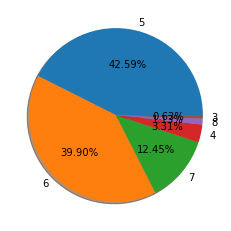

In [46]:
labels='5','6','7','4','8','3'

fig, ax=plt.subplots()
ax.pie(df['quality'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)

plt.show()

Showing the Data distribution of the data through pie chart.

In [47]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


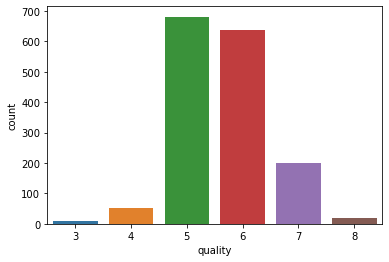

In [48]:
sns.countplot(df['quality']);

Displayed the data imbalance in our target variables.

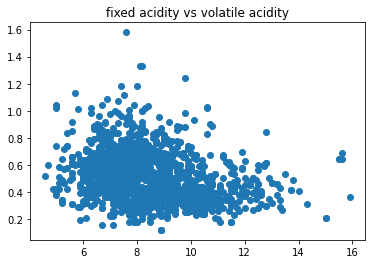

In [49]:
plt.scatter(df["fixed acidity"],df["volatile acidity"])
plt.title("fixed acidity vs volatile acidity")
plt.show()

*This scatter plot shows the the relation between the two columns "fixed acidity" vs "volatile acidity" and also we can see some outliers on the plot

#### Checking the correlation

In [50]:
cor=df.corr()

In [51]:
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

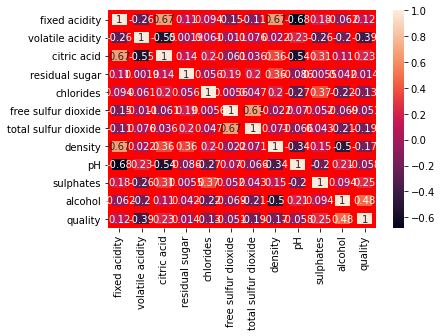

In [52]:
sns.heatmap(cor,annot=True,linewidths=6,linecolor='r')

Showing the relation of the variables using the Heatmap.

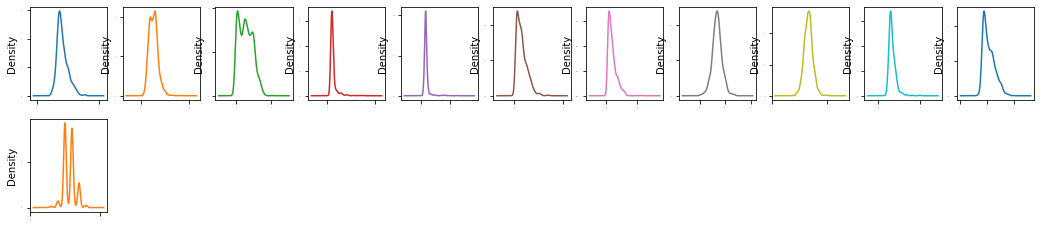

In [111]:
df.plot(kind='density', subplots=True, layout=(6,11),sharex=False, legend=False, fontsize=1, figsize=(18,12))
plt.show()

*This distribution plot shows the distribution of the data in all columns with skewness in columns

In [54]:
corr_matrix=df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

### Checking for outliers

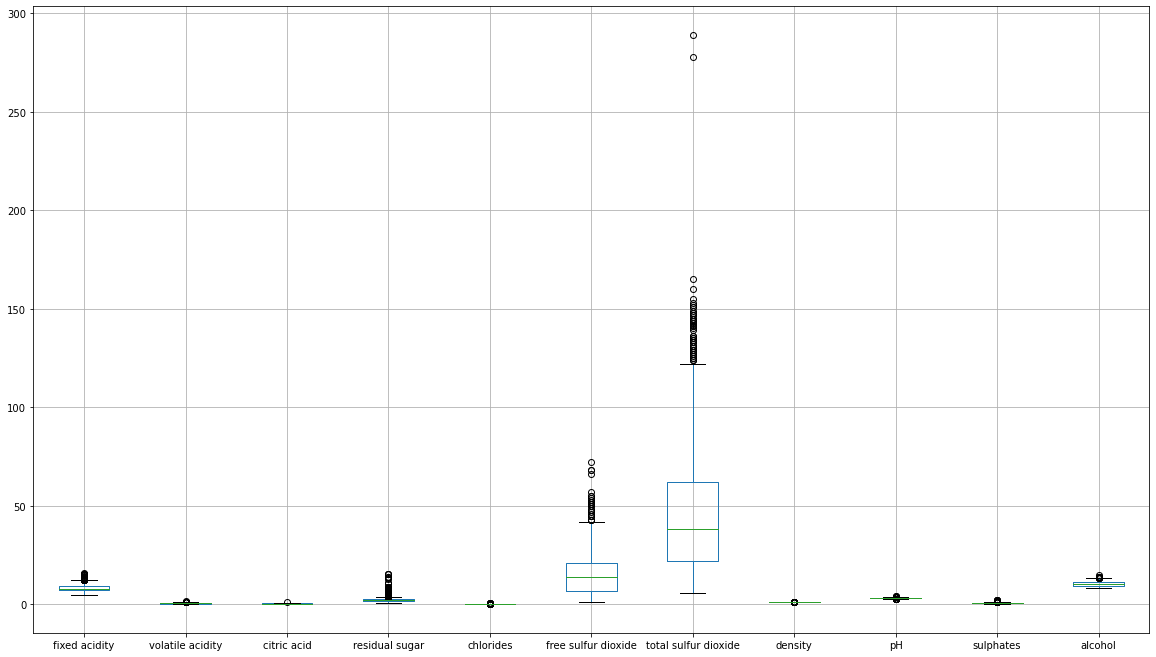

In [55]:
x.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.30)
plt.show()

The boxplot shows the outliers present in the variables

In [56]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

Used Zscore Method to remove the outliers.

In [57]:
new_df.shape

(1451, 12)

Checked the data shape after applying the Zscore Method and we have 1451 rows and 12 columns.

In [112]:
df.shape

(1599, 12)

Initial data shape before applying the Zscore method.

In [59]:
Data_loss=((1599-1451)/1599)*100
Data_loss

9.255784865540964

Checked the Data loss and we have lost 9.2% of the data.

In [60]:
x = df.drop("quality",axis=1)
y = df["quality"]

storing the Indipendent variable in x and target variable in y.

In [61]:
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

we can see the skewness in our indipendent variables

In [62]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

Applied the power_transform method to remove the skewness

In [118]:
df_new.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

After applying the power_transform method, Now we can see the Skewness is removed and the data in range +.5 to -.5

In [119]:
df1=df_new

In [120]:
df1.shape

(1599, 11)

#### Handling the class Imbalance by oversampling

In [121]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over = SM.fit_resample(x,y)

Used the SMOTE method to balance the data and oversampled the Data.

In [122]:
y_over.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

Balanced the Data present in our target variable.

In [81]:
x_over = df.drop(["quality"], axis=1)
y_over = df["quality"]

### Finding the Best Random State

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=.30, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS) 

Best accuracy is  0.6291666666666667  on Random_state  84


#### creating train_test split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=.30, random_state=maxRS)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.6291666666666667
[[  0   0   5   0   0   0]
 [  0   0   9   5   0   0]
 [  0   0 168  42   1   0]
 [  0   0  58 132   3   0]
 [  0   0   3  48   2   0]
 [  0   0   0   4   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        14
           5       0.69      0.80      0.74       211
           6       0.57      0.68      0.62       193
           7       0.33      0.04      0.07        53
           8       0.00      0.00      0.00         4

    accuracy                           0.63       480
   macro avg       0.27      0.25      0.24       480
weighted avg       0.57      0.63      0.58       480



For the Logistic regression we got the model accuracy 62.91%

In [98]:
scr=cross_val_score(LR,x,y,cv=5)
print("Cross Validation Score of Logistic Regression Model :",scr.mean())

Cross Validation Score of Logistic Regression Model : 0.5722433385579937


In [99]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.5791666666666667
[[  0   1   2   2   0   0]
 [  1   2   6   5   0   0]
 [  1   6 146  52   6   0]
 [  2   7  51 106  25   2]
 [  0   0   9  18  23   3]
 [  0   0   1   1   1   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.12      0.14      0.13        14
           5       0.68      0.69      0.69       211
           6       0.58      0.55      0.56       193
           7       0.42      0.43      0.43        53
           8       0.17      0.25      0.20         4

    accuracy                           0.58       480
   macro avg       0.33      0.34      0.33       480
weighted avg       0.58      0.58      0.58       480



For the DecisionTreeClassifier we got the model accuracy 57.91%

In [100]:
scr=cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score of Decision Tree Model :",scr.mean())

Cross Validation Score of Decision Tree Model : 0.48530760188087774


In [101]:
from sklearn.ensemble import RandomForestClassifier

rf=DecisionTreeClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

0.575
[[  0   2   1   2   0   0]
 [  1   1   8   3   1   0]
 [  0   7 146  53   5   0]
 [  0   4  56 108  25   0]
 [  0   1  11  20  20   1]
 [  0   0   0   3   0   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.07      0.07      0.07        14
           5       0.66      0.69      0.67       211
           6       0.57      0.56      0.57       193
           7       0.39      0.38      0.38        53
           8       0.50      0.25      0.33         4

    accuracy                           0.57       480
   macro avg       0.36      0.33      0.34       480
weighted avg       0.57      0.57      0.57       480



For the RandomForestClassifier we got the model accuracy 57.5%

In [102]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score of Random Forest Model :",scr.mean())

Cross Validation Score of Random Forest Model : 0.48841496865203754


In [103]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test, ad_pred))
print(confusion_matrix(y_test, ad_pred))
print(classification_report(y_test, ad_pred))

0.5166666666666667
[[  0   0   0   5   0   0]
 [  0   0   3  11   0   0]
 [  0   0  86 125   0   0]
 [  0   0  31 162   0   0]
 [  0   0   8  45   0   0]
 [  0   0   1   3   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        14
           5       0.67      0.41      0.51       211
           6       0.46      0.84      0.60       193
           7       0.00      0.00      0.00        53
           8       0.00      0.00      0.00         4

    accuracy                           0.52       480
   macro avg       0.19      0.21      0.18       480
weighted avg       0.48      0.52      0.46       480



For the SupportVectorClassifier we got the model accuracy 51.66%

In [104]:
scr=cross_val_score(svc,x,y,cv=5)
print("Cross Validation Score of SVC Model :",scr.mean())

Cross Validation Score of SVC Model : 0.5021728056426331


Difference of Logistic Regression Model : 6

Difference of Decision Tree Model : 10

Difference of Random Forest Model : 8

Difference of SVC Model : 1

### Hyper Parameter Tuning

Used the Hyper Parameter method for the best model.

In [105]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [2.0, 3.0, 4.0, 5.0],
             'degree': [4, 5, 6, 7],
             'max_iter': [2, 3, 4, 5],
             'gamma': ['scale','auto']}

Used the SupprtVectorClassifier parameters.

In [106]:
GCV=GridSearchCV(SVC(),parameters,cv=5)

In [107]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [2.0, 3.0, 4.0, 5.0], 'degree': [4, 5, 6, 7],
                         'gamma': ['scale', 'auto'], 'max_iter': [2, 3, 4, 5]})

In [108]:
GCV.best_params_

{'C': 2.0, 'degree': 4, 'gamma': 'auto', 'max_iter': 5}

we got the best parameters for the SVC.

In [109]:
mod=SVC(C=2.0,degree=4,gamma='auto',max_iter=5)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

43.958333333333336


We got the model accuracy 43.96%.

In [110]:
import joblib
joblib.dump(mod,"RedWine.pkl")

['RedWine.pkl']

Stored the model in the variable model name "RedWine".